<a href="https://colab.research.google.com/drive/152bB0LOm8f_a4YderlT_sEEJjo5bwHjS" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do Brasileirão das temporadas de 2012 à 2022
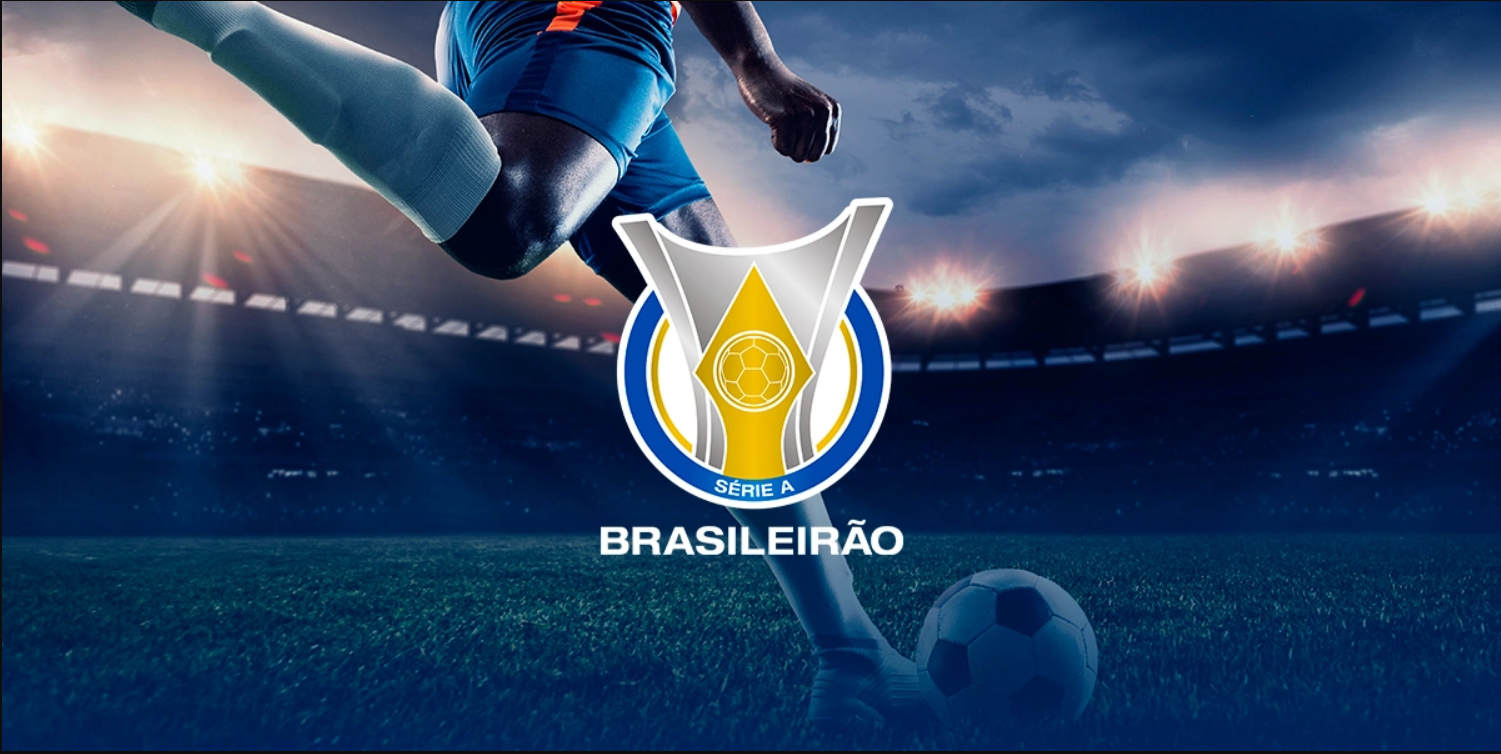


# Nesta versão #3, vamos analisar o time pela temporada e fazer a comparação com os outros times.

In [ ]:
#Importando as Bibliotecas
import pandas as pd
import numpy as np
import re
from google.colab import data_table
data_table.enable_dataframe_formatter()
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import random

Vamos importar a tabela em csv com os dados do Brasileirão do site https://www.football-data.co.uk/

In [ ]:
#DataFrame do Campeonato Brasileiro
df = pd.read_csv("https://www.football-data.co.uk/new/BRA.csv")
df.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [ ]:
#Analisando os anos que o dataframe possui
temporadas = df['Season'].unique()
temporadas

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

Este DataFrame só possui dados de 2012 até 2022| Vamos limpar os dados para ficarmos com os dados que nos interessa!

In [ ]:
df = df[['Season', 'Date', 'Time', 'Home', 'Away', 'HG', 'AG', 'Res']]
df.columns = ['Temporada', 'Data', 'Horário', 'Mandante', 'Visitante', 'Gols_M', 'Gols_V', 'Resultado']
df.head()

,Temporada,Data,Horário,Mandante,Visitante,Gols_M,Gols_V,Resultado
0,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D
1,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D
2,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H
3,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H
4,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A


Caso queira consultar uma temporada especifica, basta chamar o DataFrame por ano

In [ ]:
#Filtro de Temporada 
geral = df
t_2012 = df.Temporada == 2012
t_2013 = df.Temporada == 2013
t_2014 = df.Temporada == 2014
t_2015 = df.Temporada == 2015
t_2016 = df.Temporada == 2016
t_2017 = df.Temporada == 2017
t_2018 = df.Temporada == 2018
t_2019 = df.Temporada == 2019
t_2020 = df.Temporada == 2020
t_2021 = df.Temporada == 2021
t_2022 = df.Temporada == 2022


In [ ]:
#Gerando o DataFrame correspondente ao Ano da temporada
t12 = df[t_2012]
t13 = df[t_2013]
t14 = df[t_2014]
t15 = df[t_2015]
t16 = df[t_2016]
t17 = df[t_2017]
t18 = df[t_2018]
t19 = df[t_2019]
t20 = df[t_2020]
t21 = df[t_2021]
t22 = df[t_2022]

dic = {'t12': t12,'t13': t13,'t14': t14,'t15': t15,'t16': t16,'t17': t17,
       't18': t18,'t19': t19,'t20': t20,'t21': t21,'t22': t22, } 
season = ([t12,t13, t14, t15, t16, t17, t18, t19, t20, t21, t22 ])


Vamos analisar quais os times que participaram nas edições.

In [ ]:
#Analisando os times que disputaram o Brasileiro de 2012 à 2022
todos_times = df['Mandante'].unique()
todos_times

array(['Palmeiras', 'Sport Recife', 'Figueirense', 'Botafogo RJ',
       'Corinthians', 'Internacional', 'Ponte Preta', 'Bahia', 'Cruzeiro',
       'Vasco', 'Atletico GO', 'Flamengo RJ', 'Portuguesa', 'Nautico',
       'Atletico-MG', 'Coritiba', 'Santos', 'Sao Paulo', 'Fluminense',
       'Gremio', 'Vitoria', 'Criciuma', 'Atletico-PR', 'Goias',
       'Chapecoense-SC', 'Avai', 'Joinville', 'Santa Cruz', 'America MG',
       'Parana', 'Ceara', 'Athletico-PR', 'CSA', 'Fortaleza',
       'Bragantino', 'Cuiaba', 'Juventude'], dtype=object)

In [ ]:
#Como nem todos os times participaram de todos as temporadas, precisamos criar uma regra para que não dê erro
while True:
  temporada = input(' Qual a temporada será analisada? ')
  try:
      if temporada not in dic:
        raise ValueError(f'A temporada de {temporada} não está na lista!')
      else:
        print(f'Vamos analisar a temporada de  {str(temporada)}!')
        temporada = dic[temporada]
        break
  except ValueError as e:
      print(f'A {temporada} ou não está na lista ou está digitado errado...', e)
      print('As temporadas disponiveis para serem analisadas são: t12,t13, t14, t15, t16, t17, t18, t19, t20, t21, t22' )



 Qual a temporada será analisada? t21
Vamos analisar a temporada de  t21!


Vamos analisar os times, lembrando que a analise pode ser feita no geral ou por temporada.

In [ ]:
#Analisando os times que disputaram o Brasileiro no ano solicitado
times = temporada['Mandante'].unique()
times

array(['Cuiaba', 'Bahia', 'Sao Paulo', 'Atletico-MG', 'Ceara',
       'Flamengo RJ', 'Athletico-PR', 'Chapecoense-SC', 'Corinthians',
       'Internacional', 'Atletico GO', 'Bragantino', 'Santos',
       'Fluminense', 'America MG', 'Fortaleza', 'Juventude', 'Palmeiras',
       'Sport Recife', 'Gremio'], dtype=object)

In [ ]:
#Analisando a participação de um time
while True: #Vamos fazer um tratamento de erro
  time = input('Qual será o time  a ser analisado? ')
  
  try:
    if time not in times:
      raise ValueError(f'O {time} não está na lista!')
    else:
      print(f'Vamos analisar o {time}!')
      break
  except ValueError as e:
    print(f'O {time} ou não está na lista ou está digitado errado...', e)
    print('Os times que podem ser analisados são: ', times)

mandante = temporada.groupby(['Mandante']).get_group(time) #Mandante
visitante = temporada.groupby(['Visitante']).get_group(time) #Visitante

Qual será o time  a ser analisado? Atletico-MG
Vamos analisar o Atletico-MG!


In [ ]:
#Ano da disputa
ano = str(mandante['Temporada'].unique()).replace('[', '').replace(']','')
ano

'2021'

In [ ]:
#Quantidade de Jogos Mandante
qnt_M = len(mandante)
qnt_M

19

In [ ]:
#Quantidade de Jogos Visitante
qnt_V = len(visitante)
qnt_V

19

In [ ]:
#Analisando os jogos que o time Ganhou como mandante
flt_1 = mandante.Gols_M > mandante.Gols_V
vitorias_m = mandante[flt_1]
vitorias_m.reset_index(drop = True)

,Temporada,Data,Horário,Mandante,Visitante,Gols_M,Gols_V,Resultado
0,2021,13/06/2021,20:00,Atletico-MG,Sao Paulo,1.0,0.0,H
1,2021,01/07/2021,23:00,Atletico-MG,Atletico GO,4.0,1.0,H
2,2021,07/07/2021,23:00,Atletico-MG,Flamengo RJ,2.0,1.0,H
3,2021,25/07/2021,15:00,Atletico-MG,Bahia,3.0,0.0,H
4,2021,01/08/2021,20:00,Atletico-MG,Athletico-PR,2.0,0.0,H
5,2021,14/08/2021,23:00,Atletico-MG,Palmeiras,2.0,0.0,H
6,2021,18/09/2021,23:00,Atletico-MG,Sport Recife,3.0,0.0,H
7,2021,03/10/2021,01:00,Atletico-MG,Internacional,1.0,0.0,H
8,2021,09/10/2021,20:30,Atletico-MG,Ceara,3.0,1.0,H
9,2021,13/10/2021,23:00,Atletico-MG,Santos,3.0,1.0,H


In [ ]:
#Analisando os jogos que o time Empatou como mandante
flt_1 = mandante.Gols_M == mandante.Gols_V
empates_m = mandante[flt_1]
empates_m.reset_index(drop = True)

,Temporada,Data,Horário,Mandante,Visitante,Gols_M,Gols_V,Resultado
0,2021,22/06/2021,00:00,Atletico-MG,Chapecoense-SC,1.0,1.0,D


In [ ]:
#Analisando os jogos que o time Perdeu como mandante
flt_1 = mandante.Gols_M < mandante.Gols_V
derrotas_m = mandante[flt_1]
derrotas_m.reset_index(drop = True)

,Temporada,Data,Horário,Mandante,Visitante,Gols_M,Gols_V,Resultado
0,2021,30/05/2021,15:00,Atletico-MG,Fortaleza,1.0,2.0,A


In [ ]:
#Quantidades de vitórias como Mandante do time 
vitorias_time_mandante = len(vitorias_m)
vitorias_time_mandante

17

In [ ]:
#Quantidades de empates como Mandante do time
empates_time_mandante = len(empates_m)
empates_time_mandante

1

In [ ]:
#Quantidades de derrotas como Mandante do time 
derrotas_time_mandante = len(derrotas_m)
derrotas_time_mandante

1

In [ ]:
#Analisando os jogos que o time Ganhou como visitante
flt_2 = visitante.Gols_M < visitante.Gols_V
vitorias_v = visitante[flt_2]
vitorias_v.reset_index(drop = True)

,Temporada,Data,Horário,Mandante,Visitante,Gols_M,Gols_V,Resultado
0,2021,07/06/2021,00:30,Sport Recife,Atletico-MG,0.0,1.0,A
1,2021,16/06/2021,23:00,Internacional,Atletico-MG,0.0,1.0,A
2,2021,04/07/2021,22:15,Cuiaba,Atletico-MG,0.0,1.0,A
3,2021,10/07/2021,23:00,America MG,Atletico-MG,0.0,1.0,A
4,2021,17/07/2021,23:00,Corinthians,Atletico-MG,1.0,2.0,A
5,2021,08/08/2021,20:00,Juventude,Atletico-MG,1.0,2.0,A
6,2021,12/09/2021,20:00,Fortaleza,Atletico-MG,0.0,2.0,A
7,2021,16/11/2021,19:00,Athletico-PR,Atletico-MG,0.0,1.0,A
8,2021,02/12/2021,21:00,Bahia,Atletico-MG,2.0,3.0,A


In [ ]:
#Analisando os jogos que o time Empatou como visitante
flt_2 = visitante.Gols_M == visitante.Gols_V
empates_v = visitante[flt_2]
empates_v.reset_index(drop = True)

,Temporada,Data,Horário,Mandante,Visitante,Gols_M,Gols_V,Resultado
0,2021,24/08/2021,00:00,Fluminense,Atletico-MG,1.0,1.0,D
1,2021,30/08/2021,00:30,Bragantino,Atletico-MG,1.0,1.0,D
2,2021,26/09/2021,01:00,Sao Paulo,Atletico-MG,0.0,0.0,D
3,2021,06/10/2021,23:00,Chapecoense-SC,Atletico-MG,2.0,2.0,D
4,2021,24/11/2021,00:30,Palmeiras,Atletico-MG,2.0,2.0,D


In [ ]:
#Analisando os jogos que o Atlético MG Perdeu como visitante
flt_2 = visitante.Gols_M > visitante.Gols_V
derrotas_v = visitante[flt_2]
derrotas_v.reset_index(drop = True)

,Temporada,Data,Horário,Mandante,Visitante,Gols_M,Gols_V,Resultado
0,2021,24/06/2021,23:00,Ceara,Atletico-MG,2.0,1.0,H
1,2021,28/06/2021,00:30,Santos,Atletico-MG,2.0,0.0,H
2,2021,17/10/2021,22:15,Atletico GO,Atletico-MG,2.0,1.0,H
3,2021,30/10/2021,23:00,Flamengo RJ,Atletico-MG,1.0,0.0,H
4,2021,10/12/2021,00:30,Gremio,Atletico-MG,4.0,3.0,H


In [ ]:
#Quantidades de vitórias como Visitante do time 
vitorias_time_visitante = len(vitorias_v)
vitorias_time_visitante

9

In [ ]:
#Quantidades de empates como Visitante do time 
empates_time_visitante = len(empates_v)
empates_time_visitante

5

In [ ]:
#Quantidades de derrotas como Visitante do time 
derrotas_time_visitante = len(derrotas_v)
derrotas_time_visitante

5

In [ ]:
#Aproveitamento dentro de Casa
aprov_time_m = round(vitorias_time_mandante /qnt_M * 100)
aprov_time_m

89

In [ ]:
#Aproveitamento fora de Casa
aprov_time_v = round(vitorias_time_visitante /qnt_V * 100)
aprov_time_v

47

In [ ]:
#Gols marcados como Mandante
gp_M_time = mandante['Gols_M'].sum()
gp_M_time

42.0

In [ ]:
#Gols marcados como Visitante
gp_V_time = visitante['Gols_V'].sum()
gp_V_time

25.0

In [ ]:
#Gols sofridos como Mandante
gc_M_time = mandante['Gols_V'].sum()
gc_M_time


13.0

In [ ]:
#Gols sofridos como Visitante
gc_V_time = visitante['Gols_M'].sum()
gc_V_time

21.0

In [ ]:
#Print da Campanha em Casa
print('O relatório do ' +time+ 
      ' como mandante em ' +ano+ ' é  : \nVitórias: ' + str(vitorias_time_mandante)+ 
      ', Empates: ' +str(empates_time_mandante)+ 
      ' e Derrotas: ' +str(derrotas_time_mandante)+ 
      ' \nConquistando um aproveitamento de: ' +str(round(aprov_time_m))+ '%' 
      '\nGols Pró ' +str(gp_M_time)+ 
      ' e Gols sofridos ' +str(gc_M_time)+  
      '\nO saldo de Gols em casa é ' +str((gp_M_time - gc_M_time))+ ' gols')

O relatório do Atletico-MG como mandante em 2021 é  : 
Vitórias: 17, Empates: 1 e Derrotas: 1 
Conquistando um aproveitamento de: 89%
Gols Pró 42.0 e Gols sofridos 13.0
O saldo de Gols em casa é 29.0 gols


In [ ]:
#Print da Campanha como Visitante
print('O relatório do ' +time+ 
      ' como visitante em ' +ano+ ' é  : \nVitórias: ' + str(vitorias_time_visitante)+ 
      ', Empates: ' +str(empates_time_visitante)+ 
      ' e Derrotas: ' +str(derrotas_time_visitante)+ 
      ' \nConquistando um aproveitamento de: ' +str(round(aprov_time_v))+ '%' 
      '\nGols Pró ' +str(gp_V_time)+ 
      ' e Gols sofridos ' +str(gc_V_time)+  
      '\nO saldo de Gols em casa é ' +str((gp_V_time - gc_V_time))+ ' gols')

O relatório do Atletico-MG como visitante em 2021 é  : 
Vitórias: 9, Empates: 5 e Derrotas: 5 
Conquistando um aproveitamento de: 47%
Gols Pró 25.0 e Gols sofridos 21.0
O saldo de Gols em casa é 4.0 gols


In [ ]:
#Média aproveitamento no campeonato
media_ano = round((aprov_time_m + aprov_time_v) / 2 * 100)
print(f'O aproveitamento do {time} no Campeonato Brasileiro do ano de {ano} foi de {media_ano}%')

O aproveitamento do Atletico-MG no Campeonato Brasileiro do ano de 2021 foi de 6800%


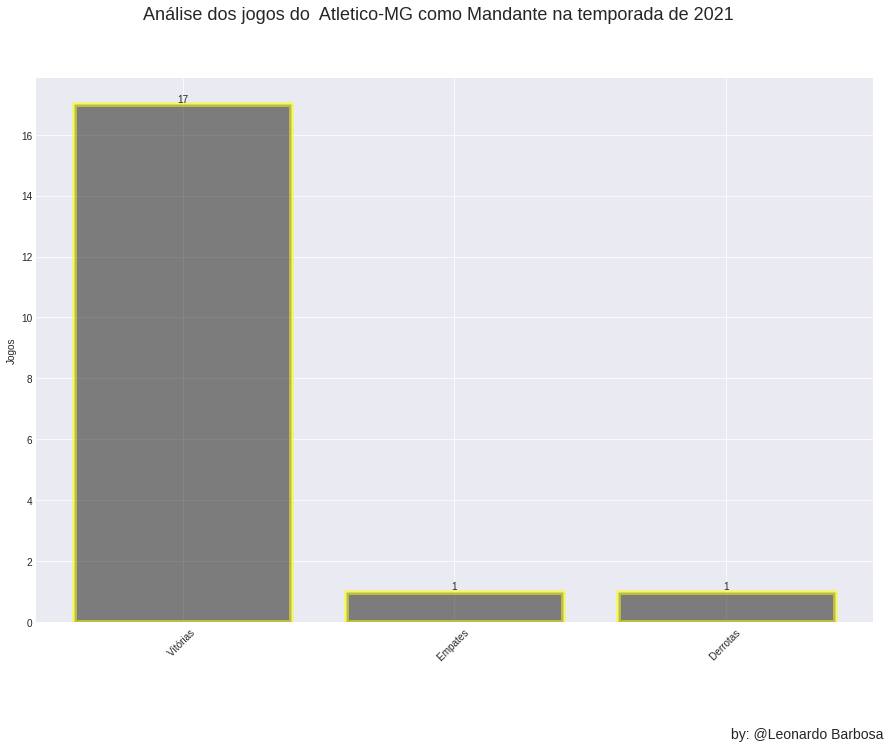

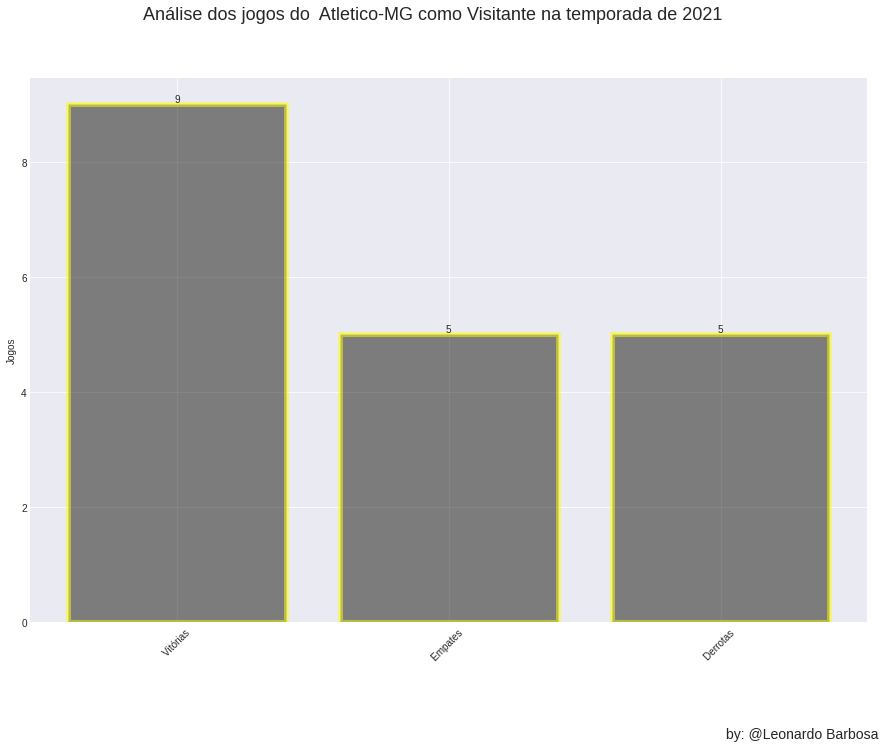

In [ ]:
#Plotar dash mandante
Figura = plt.figure( figsize=(15, 10) )
plt.style.use('seaborn-darkgrid')
plt.suptitle(f'Análise dos jogos do  {time} como Mandante na temporada de {ano} ', fontsize=18)

categorias = ["Vitórias ", "Empates ", "Derrotas "]
valores = [vitorias_time_mandante, empates_time_mandante, derrotas_time_mandante]
plt.subplot(1, 1, 1)

plt.bar(
    categorias,
    valores,
    color='#0f0f07',
    linewidth=5,
    edgecolor='yellow',
    alpha=0.5
)
for i in range(len(valores)):
    plt.text(i, valores[i], str(valores[i]), ha='center', va='bottom')

plt.ylabel('Jogos')
plt.xticks( rotation=45 )
Rodape = 'by: @Leonardo Barbosa'
Figura.text( 0.91, -0.04, Rodape, ha='right', va='bottom', size=14 );

#Plotar dash visitante
Figura1 = plt.figure( figsize=(15, 10) )
plt.style.use('seaborn-darkgrid')
plt.suptitle(f'Análise dos jogos do  {time} como Visitante na temporada de {ano} ', fontsize=18)

categorias = ["Vitórias ", "Empates ", "Derrotas "]
valores = [vitorias_time_visitante, empates_time_visitante, derrotas_time_visitante]
plt.subplot(1, 1, 1)

plt.bar(
    categorias,
    valores,
    color='#0f0f07',
    linewidth=5,
    edgecolor='yellow',
    alpha=0.5
)
for i in range(len(valores)):
    plt.text(i, valores[i], str(valores[i]), ha='center', va='bottom')

plt.ylabel('Jogos')
plt.xticks( rotation=45 )
Rodape = 'by: @Leonardo Barbosa'
Figura1.text( 0.91, -0.04, Rodape, ha='right', va='bottom', size=14 );

In [ ]:
for analise in times:
  analise_mandante = temporada.groupby(['Mandante']).get_group(analise) #Mandante
  analise_visitante = temporada.groupby(['Visitante']).get_group(analise) #Visitante
  
  #Quantidade de Jogos como Mandante
  qnt_A_M = len(analise_mandante)
      
  #Analisando os jogos que o time Ganhou como mandante
  flt_3 = analise_mandante.Gols_M > analise_mandante.Gols_V
  analise_vitoria_m = analise_mandante[flt_3]
  
  
  #Analisando os jogos que o time Empatou como mandante
  flt_3 = analise_mandante.Gols_M == analise_mandante.Gols_V
  analise_empates_m =analise_mandante[flt_3]
  
  #Analisando os jogos que o time Perdeu como mandante
  flt_3 = analise_mandante.Gols_M < analise_mandante.Gols_V
  analise_derrotas_m = analise_mandante[flt_3]
  
  #Quantidades de vitórias como Mandante do time 
  analise_vitorias_time_mandante = len(analise_vitoria_m)

  #Quantidades de empates como Mandante do time
  analise_empates_time_mandante = len(analise_empates_m)
  
  #Quantidades de derrotas como Mandante do time 
  analise_derrotas_time_mandante = len(analise_derrotas_m)
  
  #Analisando os jogos que o time Ganhou como visitante
  flt_4 = analise_visitante.Gols_M < analise_visitante.Gols_V
  analise_vitorias_v = analise_visitante[flt_4]
  
  #Analisando os jogos que o time Empatou como visitante
  flt_4 = analise_visitante.Gols_M == analise_visitante.Gols_V
  analise_empates_v = analise_visitante[flt_4]
  
  #Analisando os jogos que o time Perdeu como visitante
  flt_4 = analise_visitante.Gols_M > analise_visitante.Gols_V
  analise_derrotas_v = analise_visitante[flt_4]
  
  #Quantidades de vitórias como Visitante do time 
  analise_vitorias_time_visitante = len(analise_vitorias_v)
  
  #Quantidades de empates como Visitante do time 
  analise_empates_time_visitante = len(analise_empates_v)
  
  #Quantidades de derrotas como Visitante do time 
  analise_derrotas_time_visitante = len(analise_derrotas_v)
  
  #Aproveitamento dentro de Casa
  analise_aprov_time_m = (analise_vitorias_time_visitante /qnt_M)*100
  
  #Gols marcados como Mandante
  analise_gp_M_time = analise_mandante['Gols_M'].sum()
  
  #Gols marcados como Visitante
  analise_gp_V_time = analise_visitante['Gols_V'].sum()
  
  #Gols sofridos como Mandante
  analise_gc_M_time = analise_mandante['Gols_V'].sum()
  
  #Gols sofridos como Visitante
  analise_gc_V_time = analise_visitante['Gols_M'].sum()
  
  #Print da Informação
  print('*------------------*')
  print('                                                          ')
  print(f'O {analise} teve {qnt_A_M} jogos como mandante')
  print('O relatório do ' +analise+ 
        ' como mandante é: \nVitórias: ' + str(analise_vitorias_time_mandante)+ 
        ', Empates: ' +str(analise_empates_time_mandante)+ 
        ' e Derrotas: ' +str(analise_derrotas_time_mandante)+ 
        ' \nConquistando um aproveitamento de: ' +str(round(analise_aprov_time_m))+ '%' 
        '\nGols Pró ' +str(analise_gp_M_time)+ 
        ' e Gols sofridos ' +str(analise_gc_M_time)+  
        '\nO saldo de Gols em casa é ' +str((analise_gp_M_time - analise_gc_M_time))+ ' gols')
  
  df1 = pd.DataFrame(
      index = []
      

  )
  print('                                                          ')
  print('*------------------*')


*------------------*
                                                          
O Cuiaba teve 19 jogos como mandante
O relatório do Cuiaba como mandante é: 
Vitórias: 7, Empates: 6 e Derrotas: 6 
Conquistando um aproveitamento de: 16%
Gols Pró 18.0 e Gols sofridos 20.0
O saldo de Gols em casa é -2.0 gols
                                                          
*------------------*
*------------------*
                                                          
O Bahia teve 19 jogos como mandante
O relatório do Bahia como mandante é: 
Vitórias: 8, Empates: 5 e Derrotas: 6 
Conquistando um aproveitamento de: 16%
Gols Pró 27.0 e Gols sofridos 22.0
O saldo de Gols em casa é 5.0 gols
                                                          
*------------------*
*------------------*
                                                          
O Sao Paulo teve 19 jogos como mandante
O relatório do Sao Paulo como mandante é: 
Vitórias: 7, Empates: 9 e Derrotas: 3 
Conquistando um aproveitament